## Section 1

Generate a random adjacency matrix for a simple undirected weighted graph of 100 vertices and 500 edges with assigned random positive integer weights (note that the matrix should be symmetric and contain only 0s and weights as elements)


In [1]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from queue import Queue
import time
import bellmanford as bf

In [2]:
#generation of random adjacency matrix
def adj_matrix(num_vert, num_edg, high):
    matrix = np.zeros((num_vert, num_vert))
    num_uniq_elem = (num_vert**2 - num_vert) // 2
    edg = [np.random.randint(1, high) if x < num_edg else 0 for x in range(num_uniq_elem)]
    random.shuffle(edg)
    n = 0
    for i in range(1, num_vert):
        for j in range(i):
            matrix[i, j], matrix[j, i] = edg[n], edg[n]
            n += 1
    return matrix

In [3]:
def matrix_to_df(matrix):
    columns = list(range(len(matrix)))
    df = pd.DataFrame(columns=columns, data=matrix)
    return df   

In [ ]:
matrix = adj_matrix(100, 500, 50)

In [4]:
matrix = np.load('matrix.npy')

In [ ]:
np.save('matrix', matrix)

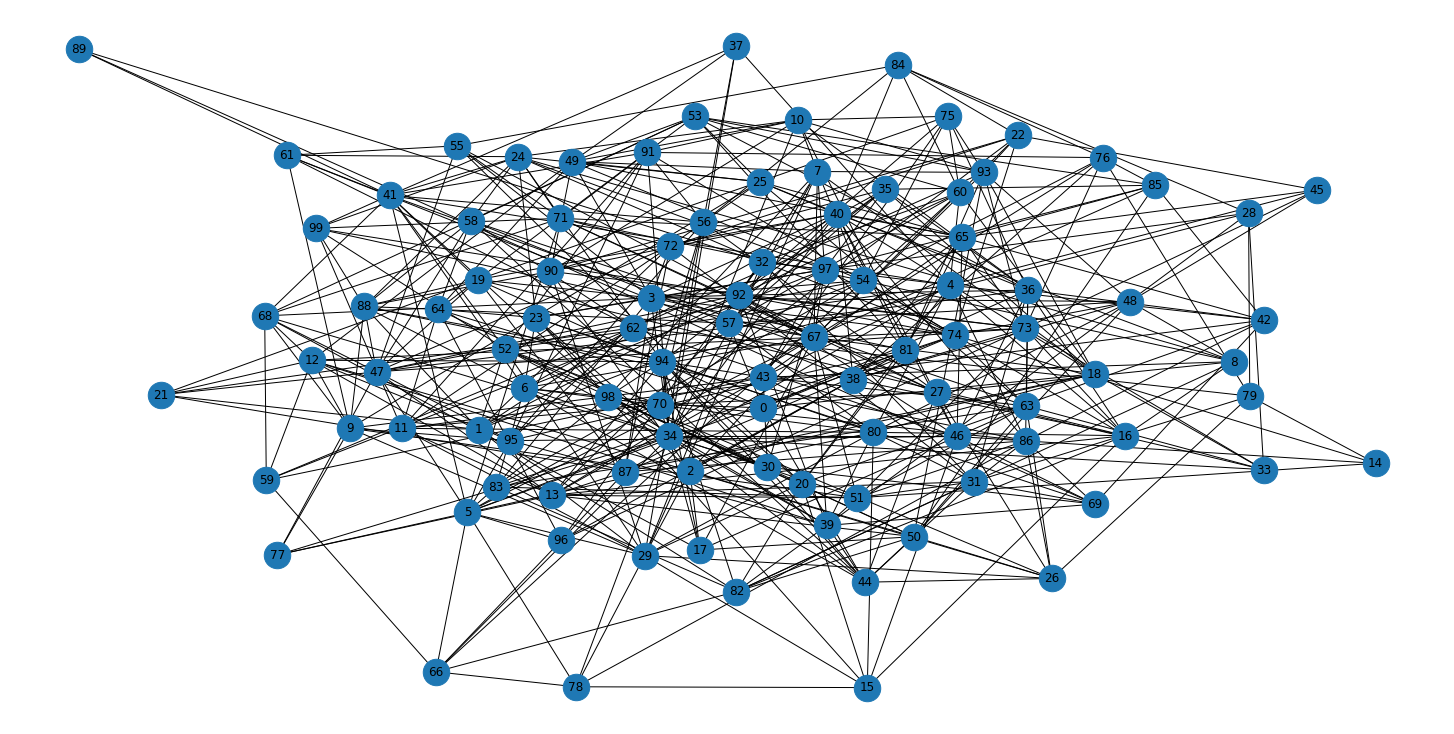

In [5]:
#graph vizualization
plt.figure(figsize=(20,10))
G = nx.Graph(matrix)
nx.draw(G, node_size=700,  with_labels=True)

In [6]:
df_matrix = matrix_to_df(matrix)
#df_matrix.to_excel("matrix.xlsx") 
df_matrix.astype('int32')

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,17,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,13,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,17,0,0,0,14,...,0,2,0,0,0,0,0,0,0,0
96,0,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,13,0,0,8,15,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,14,0,0,...,0,0,0,0,4,0,0,0,0,0


## Section 2

Use Dijkstra's and Bellman-Ford algorithms to find shortest paths between a random starting vertex and other vertices. Measure the time required to find the paths for each algorithm. Repeat the experiment 10 times for the same starting vertex and calculate the average time required for the paths search of each algorithm. Analyse the results obtained.

In [7]:
def dijkstra_alg(matrix, start):
    unvisited = list(range(len(matrix)))
    vertex_map = np.ones((len(matrix), 3)) * np.inf
    vertex_map[:,0] = list(range(len(matrix)))
    vertex_map[start, 1] = 0
    vertex_map[start, 2] = start
    
    while unvisited:
        cand = vertex_map[unvisited]
        node_ind = np.argmin(cand[:, 1])
        node= int(cand[node_ind, 0])
        
        for n, i in enumerate(matrix[node]):
            if i != 0 and vertex_map[node][1] + i < vertex_map[n][1]:
                vertex_map[n][1] = vertex_map[node][1] + i
                vertex_map[n][2] = node
        unvisited.remove(node)
    
    columns = ["Node", "Shortest path", "Previous node"]
    return pd.DataFrame(columns=columns, data=vertex_map)
    
    

In [8]:
# Bellman Ford Algorithm
class Graph:

    def __init__(self, vertices):
        self.V = vertices   # Total number of vertices in the graph
        self.graph = []     # Array of edges

    # Add edges
    def add_edge(self, s, d, w):
        self.graph.append([s, d, w])

    # Return the solution
    def return_solution(self, dist):
        df = pd.DataFrame()
        df['Node'] = list(range(self.V))
        df['Shortest path'] = dist
        return df

    def bellman_ford(self, src):

        # Step 1: fill the distance array and predecessor array
        dist = [float("Inf")] * self.V
        # Mark the source vertex
        dist[src] = 0

        # Step 2: relax edges |V| - 1 times
        for _ in range(self.V - 1):
            for s, d, w in self.graph:
                if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                    dist[d] = dist[s] + w

        # Step 3: detect negative cycle
        # if value changes then we have a negative cycle in the graph
        # and we cannot find the shortest distances
        for s, d, w in self.graph:
            if dist[s] != float("Inf") and dist[s] + w < dist[d]:
                print("Graph contains negative weight cycle")
                return

        # No negative weight cycle found!
        # Print the distance and predecessor array
        return self.return_solution(dist)

        
        
def matrix_to_graph(matrix):
    l = len(matrix)
    G = Graph(l)
    for i in range(l):
        for j in range(l):
            if matrix[i, j] !=0:
                G.add_edge(i, j, matrix[i, j])
    return G

In [9]:
def time_measure(f, params, repeats = 10):
    start = time.perf_counter()
    for i in range(repeats):
        f(*params)
    return (time.perf_counter() - start) / repeats

In [10]:
dijkstra_alg(matrix, 0).astype('int32')

,Node,Shortest path,Previous node
0,0,0,0
1,1,14,72
2,2,17,26
3,3,16,40
4,4,15,87
...,...,...,...
95,95,17,46
96,96,21,5
97,97,16,24
98,98,19,94


In [11]:
G_b = matrix_to_graph(matrix)

In [12]:
df = G_b.bellman_ford(0)
df.astype('int32')

,Node,Shortest path
0,0,0
1,1,14
2,2,17
3,3,16
4,4,15
...,...,...
95,95,17
96,96,21
97,97,16
98,98,19


In [13]:
time_measure(dijkstra_alg, params=(matrix, 0))

0.006652059999999693

In [14]:
time_measure(G_b.bellman_ford, params=[0])

0.047925819999999675

## Section 3

Generate a 10x10 cell grid with 30 obstacle cells. Choose two random non-obstacle cells and find a shortest path between them using A* algorithm. Repeat the experiment 5 times with different random pair of cells. Analyse the results obtained

In [15]:
def make_grid(size, n_obst):
    l = np.prod(size)
    grid = [1 if x < n_obst else 0 for x in range(l)]
    random.shuffle(grid)
    return np.reshape(grid, size)



In [37]:
def A_star(grid, start, finish, mark = 2):
    
    def calc_dist(p1, p2):
        dist = []
        x1, y1 = p1
        x2, y2 = p2
        return ((x2-x1)**2 + (y2-y1)**2)**0.5

    def add_cand(grid, table, node):
        (x, y), A, H, _ , P_v, _ = table.loc[table.Ver == node].values[0]
        cand = []
        for i in range(-1, 2):
            for j in range(-1, 2):
                if x+i in range(10) and y+j in range(10) and grid[x+i, y+j] == 0 and i**2+j**2 != 0 and i*j == 0:
                    dist_A = A+(i**2+j**2)**0.5
                    H_dist = calc_dist(finish, (x+i, y+j))
                    cand.append([(x+i, y+j), dist_A, H_dist, dist_A+H_dist, node, 0])
        for item in cand:
            f_d = item[3] 
            if item[0] in table.Ver.array and table.loc[table.Ver == item[0]].f.array[0] < f_d and table.loc[table.Ver == item[0]].Status.array[0] == 0:
                index = table[table.Ver == item[0]].index[0] 
                table.loc[index] = item
            if item[0] not in table.Ver.array:
                table = table.append(pd.Series(item, index=table.columns), ignore_index=True)
        
        index = table[table.Ver == node].index[0]
        table.loc[index, 'Status'] = 1
        return table
    
    
    
    table = pd.DataFrame(columns=['Ver', 'D_f_A', 'H_d', 'f', 'P_v',  'Status'])
    node = start
    table = table.append(pd.Series([node, 0, calc_dist(start, finish), 
                            calc_dist(start, finish), start, 0], index=table.columns), ignore_index=True)
    
    while node != finish:
        table = add_cand(grid, table, node)
        node = table[table.Status == 0].sort_values(by=['f']).Ver.values[0]

    #print path
    newgrid = grid.copy()
    
    while True:
        x, y = node
        newgrid[x, y] = mark
        if node == start:
            break
        node = table.loc[table.Ver == node].P_v.array[0]

    return newgrid        

In [ ]:
grid = make_grid((10, 10), 30)

In [ ]:
np.save('grid', grid)

In [18]:
grid = np.load('grid.npy')

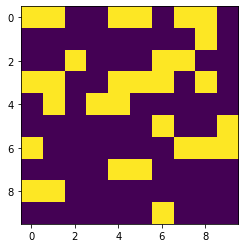

In [19]:
plt.imshow(grid)

In [20]:
dots = [[(0,2), (9,9)],
        [(7,1), (5,8)],
        [(9,0), (0,9)],
        [(4,6), (0,6)],
        [(4,0), (2,8)]]

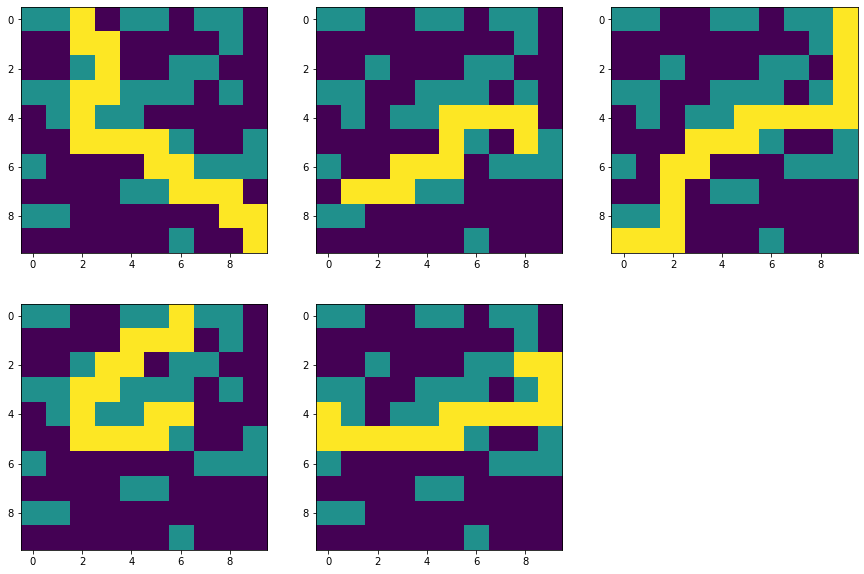

In [36]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(5):
    axs[i//3, i%3].imshow(A_star(grid, dots[i][0], dots[i][1]))
fig.delaxes(axs[-1][-1])